In [1]:
from matplotlib import pyplot as plt
import numpy as np

from rover import VoxelGrid

In [3]:
grid = VoxelGrid.from_npz("arrow/results/wiselab2/demo/map.npz", decimate=2)

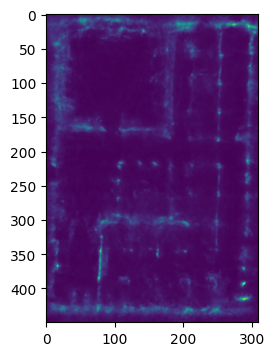

In [6]:
grid_crop = grid.crop(left=(100, 100, 30), right=(310, 450, 120))

fig, axs = plt.subplots(1, 1, figsize=(12, 4))
axs.imshow(np.sum(grid_crop.data, axis=2).T)

2024-05-03 15:12:53.291456: E external/xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng53{k2=5,k13=1,k14=2,k18=1,k23=0} for conv (f32[1,1,310,450,106]{4,3,2,1,0}, u8[0]{0}) custom-call(f32[1,1,310,450,106]{4,3,2,1,0}, f32[1,1,7,7,7]{4,3,2,1,0}), window={size=7x7x7 pad=3_3x3_3x3_3}, dim_labels=bf012_oi012->bf012, custom_call_target="__cudnn$convForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-05-03 15:12:53.898230: E external/xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.606840866s
Trying algorithm eng53{k2=5,k13=1,k14=2,k18=1,k23=0} for conv (f32[1,1,310,450,106]{4,3,2,1,0}, u8[0]{0}) custom-call(f32[1,1,310,450,106]{4,3,2,1,0}, f32[1,1,7,7,7]{4,3,2,1,0}), window={size=7x7x7 pad=3_3x3_3x3_3}, dim_labels=bf012_oi012->bf012, custom_call_target="__cudnn$convForward", backend_con

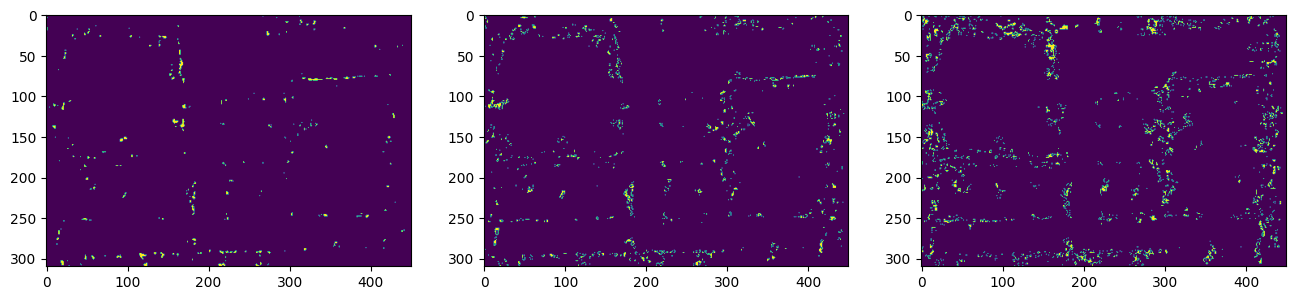

In [7]:
from jax.scipy.signal import convolve

grid_cfar = grid_crop.cfar(guard_band=1, window_size=3, convolve_func=convolve)
grid_clip = grid_crop.normalize(left=10.0, right=99.5)

layers = [(3.0, 0.25), (2.0, 0.2), (1.5, 0.15)]
masks = []

mask = False
for cfar, sigma in layers:
    layer = (grid_clip.data > sigma) & (grid_crop.data > cfar * grid_cfar.data)
    masks.append(layer & ~mask)
    mask |= layer


fig, axs = plt.subplots(1, 3, figsize=(16, 8))

for ax, m in zip(axs, masks):
    ax.imshow(m[:, :, 30])

In [9]:
grid_clip.as_pcd("arrow/results/wiselab2/demo1.pcd", masks[0])
grid_clip.as_pcd("arrow/results/wiselab2/demo2.pcd", masks[1])
grid_clip.as_pcd("arrow/results/wiselab2/demo3.pcd", masks[2])